Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Dataset Creation

In [2]:
#dataset merging

df = pd.DataFrame(columns=['Text','Language'])
for filename in os.listdir('datasets'):
    f = os.path.join('datasets', filename)
    if 'csv' in filename:
       if 'sentences' not in filename:
            df1 = pd.read_csv(f)
            if 'language' in df1.columns:
                df1=df1.rename(columns={'language':'Language'})
            df = pd.concat([df,df1],axis=0)   

In [5]:
df.head()

,Text,Language
0,\n@ZoltanTV\n @TwitterFrance\n et \n@Police...,French
1,@TwitterFrance\n c8,French
2,\n@SanaRyuk\n @alirabeh\n et 3 autres person...,French
3,\n@SoBusyDear\nIl faudrait inventer la possib...,French
4,\n@entreplume\n @PaulineLanglo15\n et \n@le...,French


In [6]:
df['Language'].unique() 

array(['French', 'English', 'Darija', 'Malayalam', 'Hindi', 'Tamil',
       'Portugeese', 'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish',
       'Italian', 'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada',
       'Estonian', 'Swedish', 'Thai', 'Japanese', 'Latin', 'Urdu',
       'Indonesian', 'Portugese', 'Chinese', 'Korean', 'Pushto',
       'Persian', 'Romanian'], dtype=object)

Visualizations

/Users/yashashvini/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


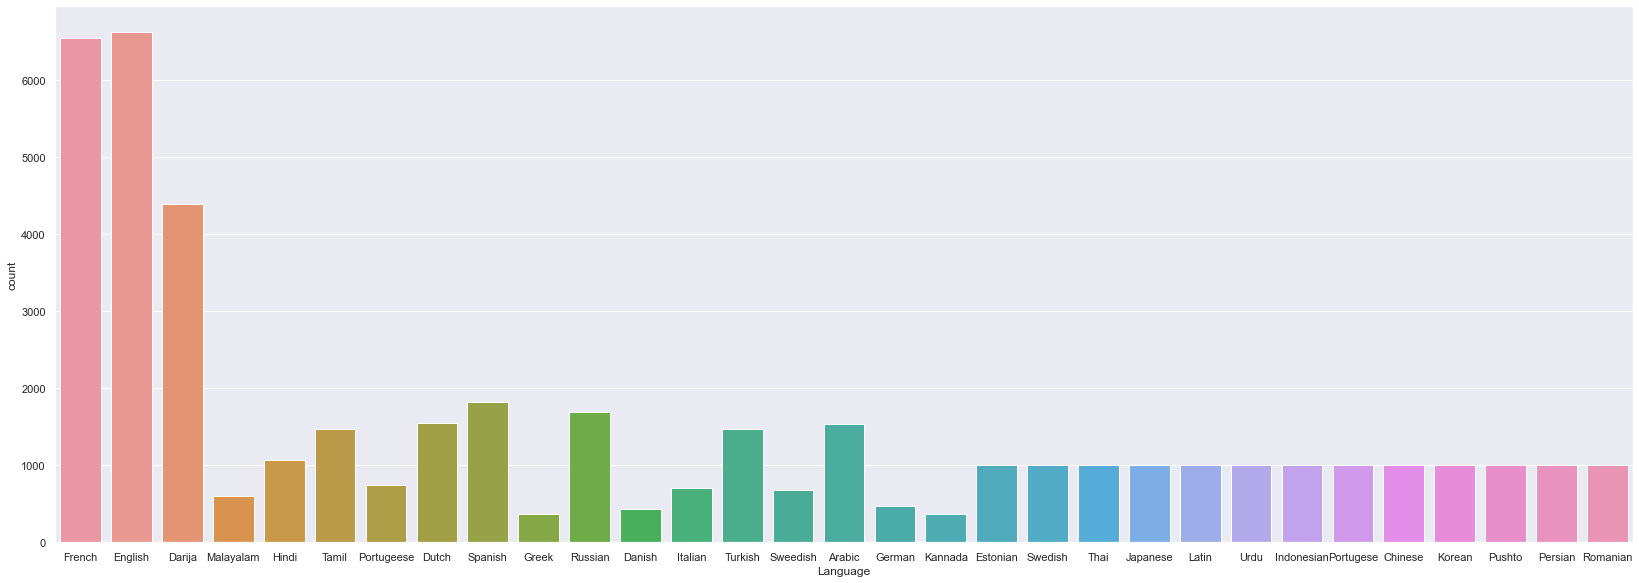

In [7]:
sns.set(rc={'figure.figsize':(23,8.27)})
sns.countplot(df.Language)
plt.tight_layout()


In [8]:
sizes = []
for lang in df['Language'].unique():
    temp = df[df['Language']== lang]
    sizes.append(temp.shape[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa825ac8c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa825adf280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa825ac8910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa825adf760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa825adfa30>],
 'means': []}

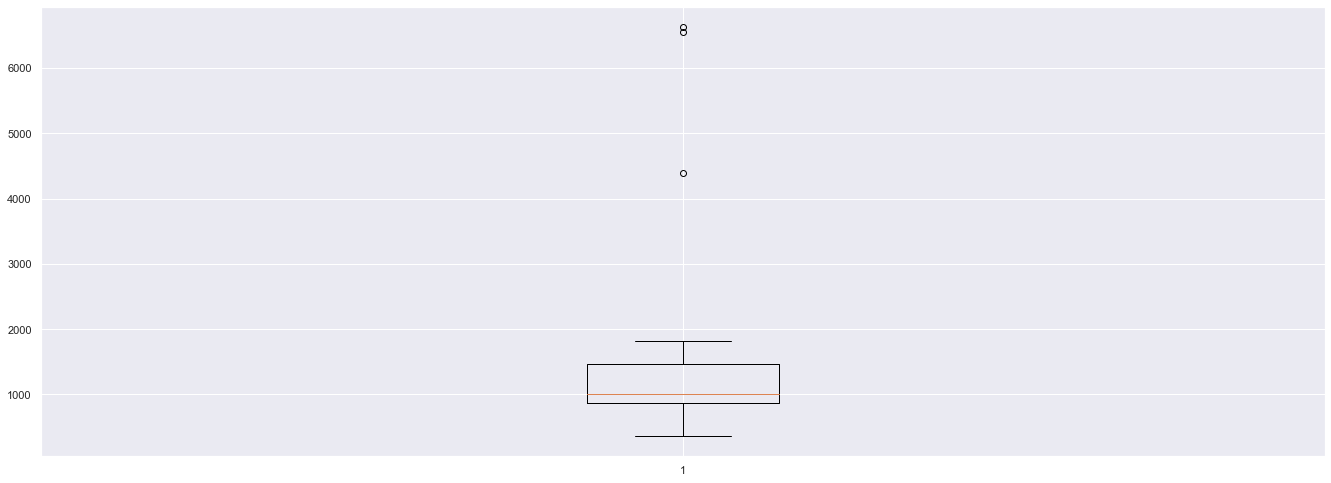

In [9]:
plt.boxplot(sizes)

In [11]:
for lang in df['Language'].unique():
    temp = df[df['Language']== lang]
    if temp.shape[0] > 4300:
        print(lang)

French
English
Darija


In [12]:
df.head()

,Text,Language
0,\n@ZoltanTV\n @TwitterFrance\n et \n@Police...,French
1,@TwitterFrance\n c8,French
2,\n@SanaRyuk\n @alirabeh\n et 3 autres person...,French
3,\n@SoBusyDear\nIl faudrait inventer la possib...,French
4,\n@entreplume\n @PaulineLanglo15\n et \n@le...,French


In [13]:
import re
def preprocess(s):
        tokens=[]
        pattern = r'[0-9]'
        for j in str(s).split():
            j = j.replace('\n','')
            j =j.replace(r"\n",'')
            j= j.replace(r"]",'')
            j= j.replace(r"[",'')
            j= j.replace(r".",'')
            j= j.replace(r'b"','')
            j= j.replace(r"b'",'')
            j= j.replace(r"\'",'')
            j = j.replace('"','')
            j = j.replace(':','')
            j = j.replace(' ','')
            j = j.replace('(','')
            j = j.replace(')','')
            j = j.replace('--','')
            j = j.replace('-','')
            j = j.replace(',','')
            j = j.replace('@',' ')
            j = j.replace('_',' ')
            j = j.replace('#',' ')
            j = j.replace('$',' ')
            j = j.replace('%',' ')
            j = j.replace('^',' ')
            j = j.replace('&',' ')
            j = j.replace('*',' ')
            j = re.sub(pattern,' ',j)
            
            if len(j)!=0:
                tokens.append(j)
        return tokens

def remove_tags(s):
    s = str(s)
    r = re.sub('','',s)          #remove HTML tags
    r = re.sub('https://.*','',r)   #remove URLs
    r = r.lower()
    return r

In [14]:
df['Text'] = df['Text'].apply(remove_tags)

In [15]:
df['Text'] = df['Text'].apply(preprocess)

In [16]:
df.head()

,Text,Language
0,"[ zoltantv, twitterfrance, et, policenationa...",French
1,"[ twitterfrance, c ]",French
2,"[ sanaryuk, alirabeh, et, , autres, personne...",French
3,"[ sobusydear, il, faudrait, inventer, la, poss...",French
4,"[ entreplume, paulinelanglo , et, le parisi...",French


In [17]:
#loading fourth datatset
temp = pd.read_csv('/Users/yashashvini/Desktop/MSU/CSE842/project/datasets/sentences.csv')

In [18]:
temp.head()

,id,lan_code,sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [ ]:
lang=[]
for i in temp['lan_code'].unique():
    if 1000 <= temp[temp['lan_code']==i].shape[0] <= 6000:
        lang.append(i)
    

In [20]:
import json
with open('/Users/yashashvini/Desktop/MSU/CSE842/project/datasets/lan_to_language.json', 'r') as f:
  js_file = json.load(f)

In [21]:
def name_change(x):
    var = x['lan_code']
    x['lan_code'] = js_file[var]
    return x

In [22]:
df_1 = pd.DataFrame(columns=['Text','Language'])
for lan in lang:
    #print(lang.index(lan))
    t = temp[temp['lan_code']==lan]
    t = t.apply(name_change,axis=1)
    t = t .drop(['id'],axis=1)
    t = t.rename(columns={'lan_code':'Language','sentence':'Text'})
    t = t.reset_index(drop=True)
    df_1 = pd.concat([df_1,t])

    

In [23]:
df_1.head()

,Text,Language
0,إلّي بّلاش كَتّر مِنّو.‏‏,Egyptian Arabic
1,ساعدوا بعض في الواجب.,Egyptian Arabic
2,خايف أكون أكلت حاجة خربانة.,Egyptian Arabic
3,بتشدّك المزّيكا الياباني؟,Egyptian Arabic
4,ما تعاملش الناس بناءً على جنسيتهم أو جنسهم أو ...,Egyptian Arabic


In [24]:
df_1.isna().sum()

Text        0
Language    0
dtype: int64

In [25]:
df_1['Text'] = df_1['Text'].apply(remove_tags)
df_1['Text'] = df_1['Text'].apply(preprocess)

In [26]:
df = pd.concat([df,df_1])
df.head()

,Text,Language
0,"[ zoltantv, twitterfrance, et, policenationa...",French
1,"[ twitterfrance, c ]",French
2,"[ sanaryuk, alirabeh, et, , autres, personne...",French
3,"[ sobusydear, il, faudrait, inventer, la, poss...",French
4,"[ entreplume, paulinelanglo , et, le parisi...",French


In [28]:
len(df['Language'].unique())

88

Plots after adding fourth dataset

/Users/yashashvini/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Language', ylabel='count'>

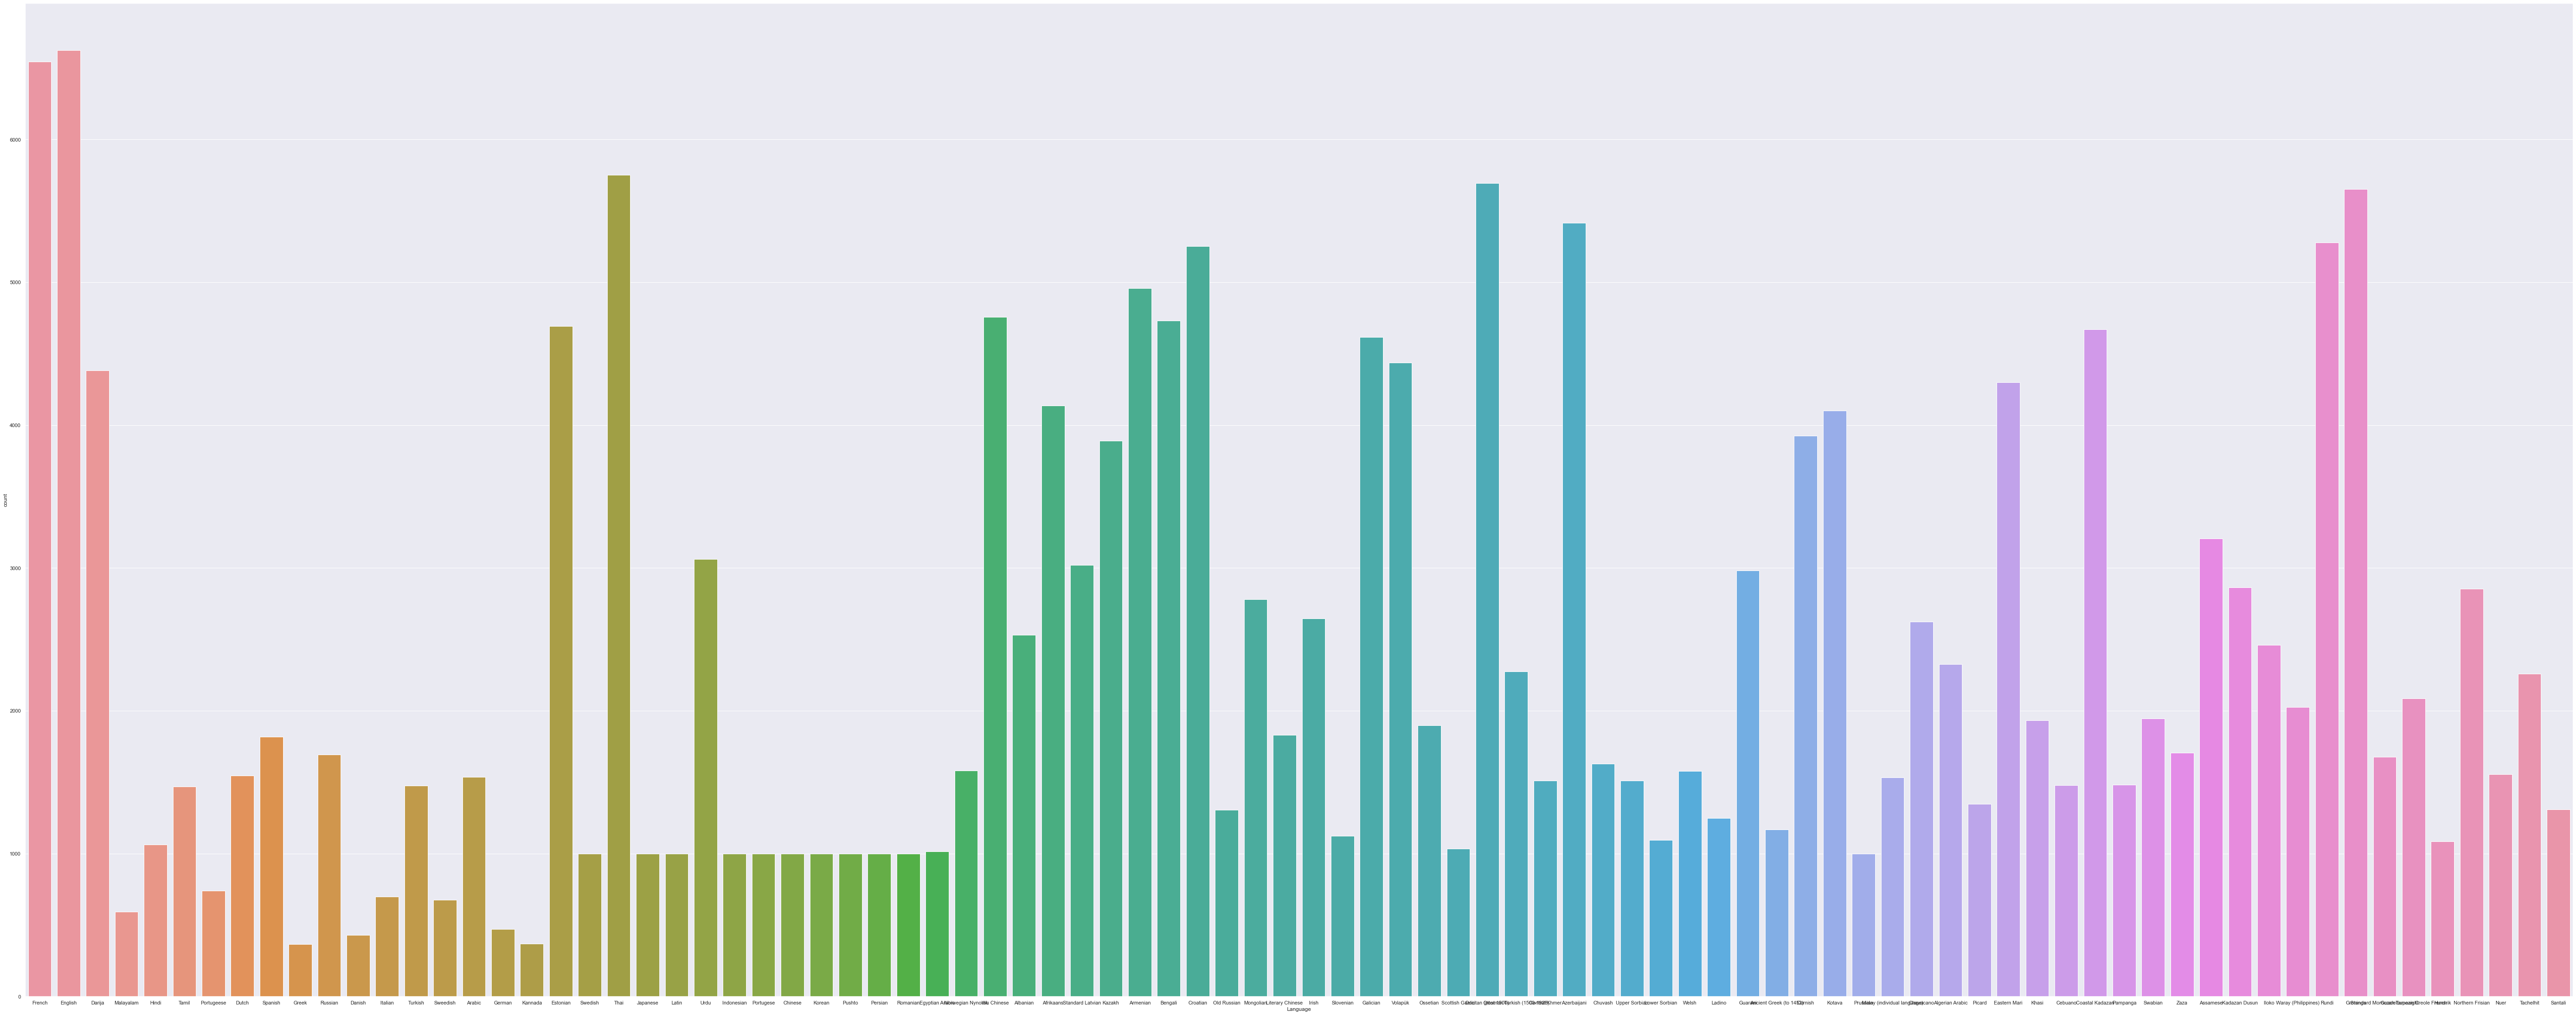

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=30)
sns.set(rc={'figure.figsize':(100,40)})
sns.countplot(df.Language)
#plt.tight_layout()


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc895855640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc895855ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc895855370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8958430a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc895843370>],
 'means': []}

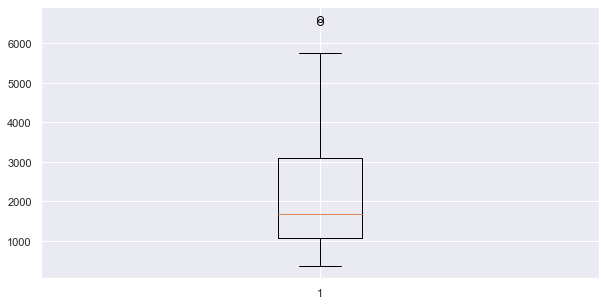

In [30]:
sizes = []
for lang in df['Language'].unique():
    temp = df[df['Language']== lang]
    sizes.append(temp.shape[0])

sns.set(font_scale=30)
sns.set(rc={'figure.figsize':(10,5)})
plt.boxplot(sizes)

In [85]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 2.9 MB/s eta 0:00:01


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [32]:
def polarity(x):
    scores = analyzer.polarity_scores(' '.join(x))
    if 0.05 < scores['compound'] <= 1:
        return 'pos'
    elif -1 < scores['compound'] <= -0.05:
        return 'neg'
    else:
        return 'neutral'
    

In [33]:
df['Sentiment'] = df['Text'].apply(polarity)

/Users/yashashvini/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

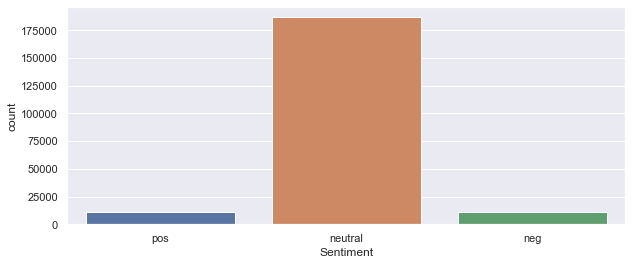

In [34]:

sns.set(font_scale=4)
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(df.Sentiment)
#plt.tight_layout()


In [35]:
def mix(x):
    return ' '.join(x)

In [36]:
df['Text']=df['Text'].apply(mix)

In [18]:
df = pd.read_csv('/Users/yashashvini/Desktop/MSU/CSE842/project/final.csv')
df = df.drop('Unnamed: 0',axis=1)
df 

,Text,Language,Sentiment
0,zoltantv twitterfrance et policenationale i...,French,pos
1,twitterfrance c,French,neutral
2,sanaryuk alirabeh et autres personnes san...,French,pos
3,sobusydear il faudrait inventer la possibilit...,French,neutral
4,entreplume paulinelanglo et le parisien e...,French,neutral
...,...,...,...
208336,ᱡᱟᱦᱟᱨ ᱜᱮ ᱤᱧ ᱵᱟᱹᱵᱩ ᱫᱚ ᱱᱚᱰᱮ ᱯᱟᱲᱦᱟᱣᱜ ᱠᱟᱱᱟᱭ ᱾,Santali,neutral
208337,ᱤᱧ ᱫᱚ ᱟᱹᱰᱤ ᱫᱩᱞᱟᱹᱲ ᱛᱮ ᱱᱚᱰᱮ ᱯᱟᱲᱦᱟᱣᱮ ᱠᱟᱹᱱᱟᱹᱧ ᱾,Santali,neutral
208338,ᱱᱚᱰᱮ ᱫᱚ ᱦᱚᱥᱴᱮᱞ ᱛᱤᱱᱟᱹᱜ ᱢᱟᱨᱟᱝᱟ ᱾,Santali,neutral
208339,ᱢᱟᱨᱟᱝ ᱜᱮᱭᱟ ᱜᱚᱢᱠᱮ ᱟᱹᱰᱤ ᱢᱟᱨᱟᱝ ᱜᱮᱭᱟ ᱾,Santali,neutral


In [19]:
df = df.dropna()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42)

Bow

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer()
X_train_bow = countvect.fit_transform(X_train)

In [12]:
X_train_bow = X_train_bow.toarray()

In [22]:
X_test_bow = countvect.transform(X_test)
#X_test_bow = X_test_bow.toarray()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_bow = le.fit_transform(y_train)
y_test_bow = le.transform(y_test)

In [24]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train_bow , y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Bag of Words:")
y_pred_bow = NB.predict(X_test_bow)
print(classification_report(y_test, y_pred_bow))
print(accuracy_score(y_test, y_pred_bow))
#print(confusion_matrix(y_test, y_pred_bow))

Bag of Words:
                             precision    recall  f1-score   support

                  Afrikaans       0.95      0.97      0.96       816
                   Albanian       0.98      0.93      0.95       490
            Algerian Arabic       0.90      0.79      0.84       458
    Ancient Greek (to 1453)       1.00      0.92      0.96       243
                     Arabic       0.75      0.98      0.85       318
                   Armenian       1.00      0.97      0.98       997
                   Assamese       0.97      0.79      0.87       676
                Azerbaijani       0.97      0.93      0.95      1075
                    Bengali       0.91      0.95      0.93       975
                    Cebuano       0.99      0.79      0.88       290
              Central Khmer       1.00      0.83      0.91       312
                  Chavacano       0.94      0.93      0.94       531
                    Chinese       0.91      0.35      0.51       211
                   

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#LG = LogisticRegression(solver = 'saga' , penalty = 'l1' , C = 0.1)
DT = DecisionTreeClassifier()

#LG.fit(X_train_bow , y_train_bow)
DT.fit(X_train_bow , y_train_bow)



DecisionTreeClassifier()

In [38]:
print("Bag of Words [DT]:")
y_pred_dt = DT.predict(X_test_bow)
#print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test_bow, y_pred_dt))

Bag of Words [DT]:
0.7853508687721993


In [39]:
nb_score = NB.score(X_test_bow, y_test)
dt_score = DT.score(X_test_bow, y_test_bow)

<AxesSubplot:>

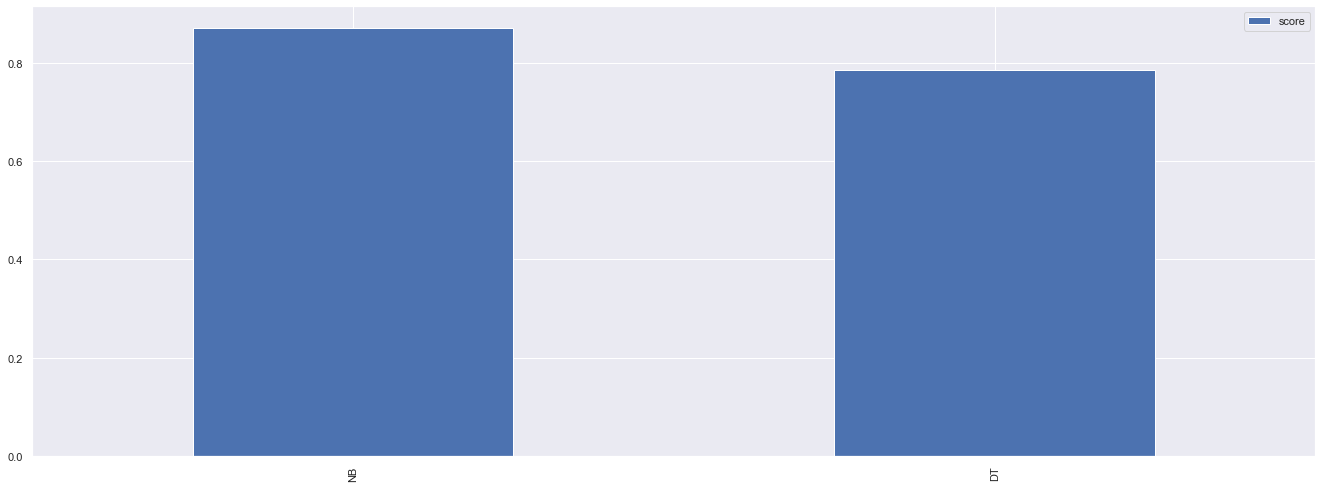

In [40]:
dic = {"NB":nb_score,"DT":dt_score}
dic = pd.DataFrame.from_dict(dic , orient='index' , columns = ["score"])
dic.plot(kind = "bar")

TFIDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Tf-idf  
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [43]:
NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train_tfidf , y_train)
print("Tf-idf:")
y_pred_tfidf = NB_tfidf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_tfidf))
print(accuracy_score(y_test, y_pred_tfidf))
#print(confusion_matrix(y_test, y_pred_bow))

Tf-idf:
                             precision    recall  f1-score   support

                  Afrikaans       0.92      0.98      0.95       816
                   Albanian       0.98      0.91      0.95       490
            Algerian Arabic       0.86      0.82      0.84       458
    Ancient Greek (to 1453)       1.00      0.83      0.91       243
                     Arabic       0.89      0.96      0.92       318
                   Armenian       1.00      0.97      0.98       997
                   Assamese       0.98      0.77      0.86       676
                Azerbaijani       0.90      0.94      0.92      1075
                    Bengali       0.91      0.95      0.93       975
                    Cebuano       1.00      0.73      0.84       290
              Central Khmer       1.00      0.74      0.85       312
                  Chavacano       0.95      0.96      0.96       531
                    Chinese       0.91      0.15      0.25       211
                    Chuva

In [44]:
DT_tfidf = DecisionTreeClassifier()
DT_tfidf.fit(X_train_tfidf , y_train_bow)

DecisionTreeClassifier()

In [45]:
print("Tf-idf [DT]:")
y_pred_dt_tfidf = DT_tfidf.predict(X_test_tfidf)
#print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test_bow, y_pred_dt_tfidf))

Tf-idf [DT]:
0.7659594892963425


<AxesSubplot:>

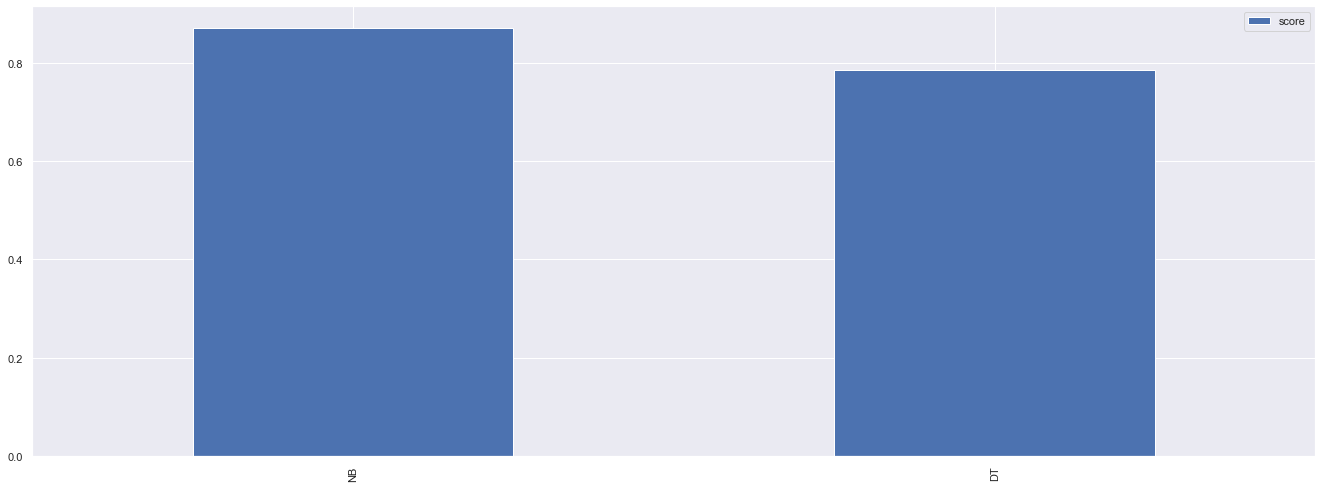

In [46]:
nb_tfidf_score = NB_tfidf.score(X_test_tfidf, y_test)
dt_tfidf_score = DT_tfidf.score(X_test_tfidf, y_test_bow)
dic = {"NB":nb_score,"DT":dt_score}
dic = pd.DataFrame.from_dict(dic , orient='index' , columns = ["score"])
dic.plot(kind = "bar")

NN MODEL

In [47]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

2023-03-27 20:33:16.048736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 524788 unique tokens.


In [49]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (208338, 250)


In [50]:
Y = pd.get_dummies(df['Language']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (208338, 88)


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(166670, 250) (166670, 88)
(41668, 250) (41668, 88)


In [53]:
from keras.layers import Bidirectional,TimeDistributed

In [77]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
bilstm_model.add(SpatialDropout1D(0.5))
bilstm_model.add(Dense(120, activation='relu'))
bilstm_model.add(SpatialDropout1D(0.5))
bilstm_model.add(Bidirectional(LSTM(100)))
bilstm_model.add(Dense(88, activation='softmax'))
bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(bilstm_model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_17 (Spati  (None, 250, 100)         0         
 alDropout1D)                                                    
                                                                 
 dense_36 (Dense)            (None, 250, 120)          12120     
                                                                 
 spatial_dropout1d_18 (Spati  (None, 250, 120)         0         
 alDropout1D)                                                    
                                                                 
 bidirectional_12 (Bidirecti  (None, 200)              176800    
 onal)                                                           
                                                     

In [78]:
epochs = 5
batch_size = 128

history = bilstm_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
1172/1172 [==============================] - 1152s 976ms/step - loss: 2.4282 - accuracy: 0.3773 - val_loss: 1.1783 - val_accuracy: 0.7059
Epoch 2/5
1172/1172 [==============================] - 1109s 947ms/step - loss: 1.0458 - accuracy: 0.7285 - val_loss: 0.7214 - val_accuracy: 0.8196
Epoch 3/5
1172/1172 [==============================] - 1135s 968ms/step - loss: 0.7413 - accuracy: 0.8078 - val_loss: 0.6170 - val_accuracy: 0.8415
Epoch 4/5
1172/1172 [==============================] - 1096s 935ms/step - loss: 0.6336 - accuracy: 0.8349 - val_loss: 0.5801 - val_accuracy: 0.8507
Epoch 5/5
1172/1172 [==============================] - 1086s 926ms/step - loss: 0.5753 - accuracy: 0.8499 - val_loss: 0.5640 - val_accuracy: 0.8538


In [79]:
loss, accuracy = bilstm_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

1303/1303 [==============================] - 124s 95ms/step - loss: 0.5569 - accuracy: 0.8567
Loss: 0.5569007992744446,
Accuracy: 0.856652557849884
